In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.regularizers import l1,l2

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:05<00:00, 239MB/s]
100% 1.06G/1.06G [00:05<00:00, 209MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

[10000, 10000]


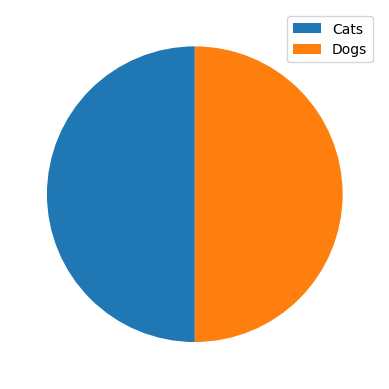

In [ ]:
cat_count = len(os.listdir('/content/train/cats'))
dog_count = len(os.listdir('/content/train/dogs'))

counts = [cat_count,dog_count]
print(counts)

plt.pie(counts,startangle = 90) #Perfectly balanced dataset
plt.legend(labels = ['Cats', 'Dogs'])

In [ ]:
#Parameters

img_height = 256
img_width = 256

In [ ]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (img_height,img_width)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (img_height,img_width)
)

Found 5000 files belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)))

model.add(layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(layers.Conv2D(64, kernel_size = (3,3),  activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(layers.Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
#Compiling the model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Summary

model.summary()

In [ ]:
hist = model.fit(
    train,
    validation_data = validation,
    epochs = 15
)

Epoch 1/15
625/625 [==============================] - 92s 140ms/step - loss: 1.1310 - accuracy: 0.5846 - val_loss: 0.6292 - val_accuracy: 0.6524
Epoch 2/15
625/625 [==============================] - 75s 119ms/step - loss: 0.5966 - accuracy: 0.6827 - val_loss: 0.6134 - val_accuracy: 0.6748
Epoch 3/15
625/625 [==============================] - 71s 113ms/step - loss: 0.5232 - accuracy: 0.7423 - val_loss: 0.4772 - val_accuracy: 0.7704
Epoch 4/15
625/625 [==============================] - 72s 114ms/step - loss: 0.4507 - accuracy: 0.7886 - val_loss: 0.4298 - val_accuracy: 0.8050
Epoch 5/15
625/625 [==============================] - 74s 118ms/step - loss: 0.3717 - accuracy: 0.8335 - val_loss: 0.4326 - val_accuracy: 0.8092
Epoch 6/15
625/625 [==============================] - 83s 132ms/step - loss: 0.3065 - accuracy: 0.8686 - val_loss: 0.4199 - val_accuracy: 0.8042
Epoch 7/15
625/625 [==============================] - 71s 114ms/step - loss: 0.2344 - accuracy: 0.9010 - val_loss: 0.3249 - val_ac

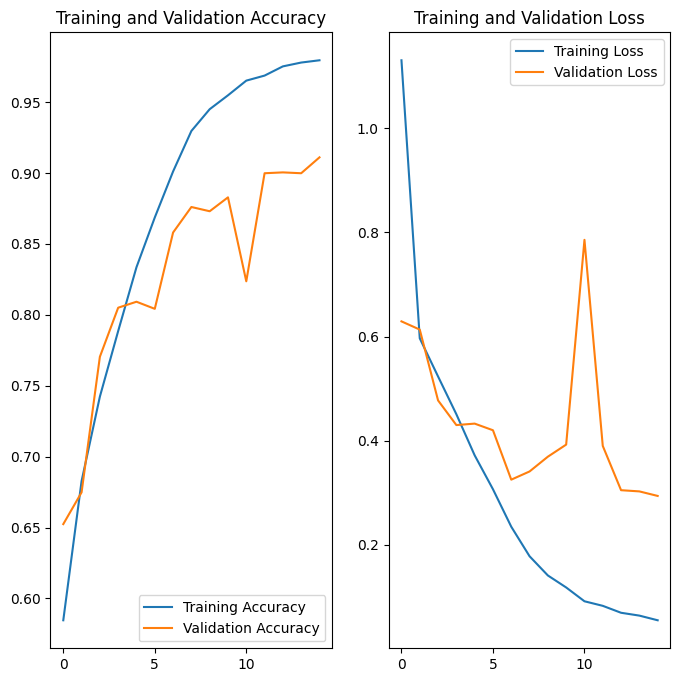

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('dogvcat.keras')